# Étude de marché: entreprise IAA souhaitant s'exporter à l'international

Etude data - Projet 9 - Melvin Derouck (Janvier 2024) / OpenClassrooms - ENSAE-ENSAI

<p><em>Data source</em> <a href="http://www.fao.org/faostat/fr/#data">FAO, <a href="https://www.kaggle.com/datasets">Kaggle</a><br>
<em>Industrie Agroalimentaire (en abrégé IAA)</em></p>

**Rappel du contexte**

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

**Objectif** : Aider à cibler plus particulièrement certains pays, dans le but d'approfondir ensuite l'étude de marché. L'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).

**Méthodologie** : 4 exports de données seront utilisés pour réaliser cette étude :

- 2 fichiers provenant du site de la FAO
- 2 fichiers téléchargés sur Kaggle

Un premier lieu, un travail sera fait sur l'élaboration d'un échantillon contenant l'ensemble des pays disponibles caractérisé par les variables suivantes :

"Population"
"PIB (US$)/hab"
"Disponibilité alimentaire en quantité (kg/personne/an)"
"Exportations - Quantité(Tonnes)"
"Importations - Quantité(Tonnes)"
"Distance"

Une Analyse en Composantes Principales (ACP) sera appliquée pour ...

On utilisera ensuite 2 méthodes de clustering : le K-Means et la Classification Ascendante Hiérarchique (CAH)

Enfin, scoring en attribuant des poids à nos variables pour determiner quels sont les pays les plus pertinents

# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Versions utilisées

print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Pandas : 1.4.1
Numpy : 1.25.0
Seaborn : 0.11.2


# 1. Data Cleaning

## Fichier disp_alim2017

Source : https://www.fao.org/home/fr

In [3]:
df_dispalim = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\data\DisponibiliteAlimentaire_2017.csv",
    sep=","
    )

In [4]:
df_dispalim['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [5]:
df_dispalim = df_dispalim.rename(columns={'Zone': 'Pays', 'Code zone': 'Code Pays'})

In [6]:
df_dispalim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code Pays               176600 non-null  int64  
 3   Pays                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [7]:
colonnes_a_supprimer = ['Code Élément', 'Année', 'Code Domaine', 'Domaine', 'Symbole', 'Code année', 'Description du Symbole']

df_dispalim = df_dispalim.drop(columns=colonnes_a_supprimer)

In [8]:
#filtre du df sur l'élément poulet

filt_produit = df_dispalim['Produit'].str.contains('poulet|volaille', case=False, regex=True)

df_poulet = df_dispalim[filt_produit]

In [9]:
#multiplication des colonnes numériques par mille pour obtenir des tonnes 

multiplication_col_dispAlim = [
    "Aliments pour animaux",
    "Autres Utilisations",
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Nourriture",
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock"
]

df_poulet.loc[df_poulet['Élément'].isin(multiplication_col_dispAlim), 'Valeur'] *= 1000

In [10]:
#renommage des colonnes pour faire apparaitre l'info des tonnes

correspondance_elements = {
    "Aliments pour animaux": "Aliments pour animaux(Tonnes)",
    "Autres Utilisations": "Autres Utilisations(Tonnes)",
    "Disponibilité intérieure": "Disponibilité intérieure(Tonnes)",
    "Exportations - Quantité": "Exportations - Quantité(Tonnes)",
    "Importations - Quantité": "Importations - Quantité(Tonnes)",
    "Nourriture": "Nourriture(Tonnes)",
    "Pertes": "Pertes(Tonnes)",
    "Production": "Production(Tonnes)",
    "Semences": "Semences(Tonnes)",
    "Traitement": "Traitement(Tonnes)",
    "Variation de stock": "Variation de stock(Tonnes)"
}

df_poulet['Élément'] = df_poulet['Élément'].replace(correspondance_elements)

In [11]:
df_poulet = df_poulet.drop(columns=["Unité", "Code Produit"])

In [12]:
#suppression des colonnes inutiles

valeurs_supp_element = ['Pertes(Tonnes)', "Production(Tonnes)", "Nourriture(Tonnes)", 'Résidus', 'Variation de stock(Tonnes)', 'Aliments pour animaux(Tonnes)', 'Semences(Tonnes)', 
                        'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                        'Disponibilité alimentaire (Kcal/personne/jour)', 'Traitement(Tonnes)', 'Autres utilisations (non alimentaire)', 'Alimentation pour touristes'
                        ]

df_poulet = df_poulet[~df_poulet['Élément'].isin(valeurs_supp_element)]

### NaN

In [13]:
df_poulet.isna().sum()

Code Pays    0
Pays         0
Élément      0
Produit      0
Valeur       0
dtype: int64

### Doublons

In [14]:
df_poulet.duplicated().sum()

0

### Recherche d'outliers

Premier quartile (Q1) : 18.82
Troisième quartile (Q3) : 78000.0
Écart interquartile (IQR) : 77981.18
Lower_bound => -116952.94999999998
Upper_bound => 194971.77


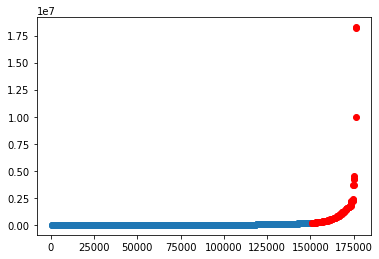

In [15]:
df_poulet_iqr = df_poulet.copy()

df_poulet_iqr['Valeur'] = sorted(df_poulet_iqr['Valeur'])

q1 = np.percentile(df_poulet_iqr['Valeur'], 25)

# Calcul du troisième quartile (Q3)
q3 = np.percentile(df_poulet_iqr['Valeur'], 75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

print("Premier quartile (Q1) :", q1)
print("Troisième quartile (Q3) :", q3)
print("Écart interquartile (IQR) :", iqr)

print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

only_ok = df_poulet_iqr[(df_poulet_iqr['Valeur'] < upper_bound) & (df_poulet_iqr['Valeur'] > lower_bound)]
only_outliers = df_poulet_iqr[(df_poulet_iqr['Valeur']> upper_bound) | (df_poulet_iqr['Valeur'] < lower_bound)]

# On plot
plt.scatter(only_ok['Valeur'].index, only_ok['Valeur'].values)
plt.scatter(only_outliers['Valeur'].index, only_outliers['Valeur'].values,c='red')

plt.show()

In [16]:
df_poulet.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\dispo alim.csv", index=False)

## Fichier population

Source : https://www.fao.org/home/fr

In [17]:
df_population = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\data\Population_2000_2018.csv", 
    sep=","
    )

In [18]:
df_population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [19]:
df_population = df_population.drop(columns=['Code année', 'Code Domaine', 'Domaine', "Unité", "Symbole", "Description du Symbole"])

df_population = df_population.rename(columns={'Zone': 'Pays', 'Code zone': 'Code Pays'})

In [20]:
#multiplication de la colonne population par 1000

df_population['Valeur'] = df_population['Valeur'] * 1000

In [21]:
#filtre sur l'année 2017

df_population = df_population[df_population['Année'] == 2017]

In [22]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code Pays     236 non-null    int64  
 1   Pays          236 non-null    object 
 2   Code Élément  236 non-null    int64  
 3   Élément       236 non-null    object 
 4   Code Produit  236 non-null    int64  
 5   Produit       236 non-null    object 
 6   Année         236 non-null    int64  
 7   Valeur        236 non-null    float64
 8   Note          1 non-null      object 
dtypes: float64(1), int64(4), object(4)
memory usage: 18.4+ KB


In [23]:
df_population.head(3)

,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Année,Valeur,Note
17,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,36296113.0,NaN
36,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,57009756.0,NaN
55,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2884169.0,NaN


### NaN

In [24]:
df_population.isna().sum()

Code Pays         0
Pays              0
Code Élément      0
Élément           0
Code Produit      0
Produit           0
Année             0
Valeur            0
Note            235
dtype: int64

### Doublons

In [25]:
df_population.duplicated().sum()

0

### Recherche d'outliers

In [26]:
z_scores = (df_population['Valeur'] - df_population['Valeur'].mean()
            ) / df_population['Valeur'].std()

z_scores

17      0.032696
36      0.189743
55     -0.220626
74      0.071311
93      0.384206
          ...   
4333   -0.019570
4352    0.474749
4371   -0.031455
4390   -0.114713
4409   -0.134554
Name: Valeur, Length: 236, dtype: float64

In [27]:
z_scores_count = ((z_scores < 2) | (z_scores < -2)).value_counts()

print(z_scores_count)

True     233
False      3
Name: Valeur, dtype: int64


In [28]:
z_scores_list = [score for score in z_scores if score > 2 or score < -2]

z_scores_list

[10.531402902230152, 2.2222327838936686, 9.907079933484564]

In [29]:
outliers_country = df_population.loc[(z_scores > 2) | (z_scores < -2)]

outliers_country.sort_values('Valeur', ascending=False)

,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Année,Valeur,Note
823,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2017,1.421022e+09,NaN
1952,100,Inde,511,Population totale,3010,Population-Estimations,2017,1.338677e+09,NaN
1230,231,États-Unis d'Amérique,511,Population totale,3010,Population-Estimations,2017,3.250848e+08,NaN


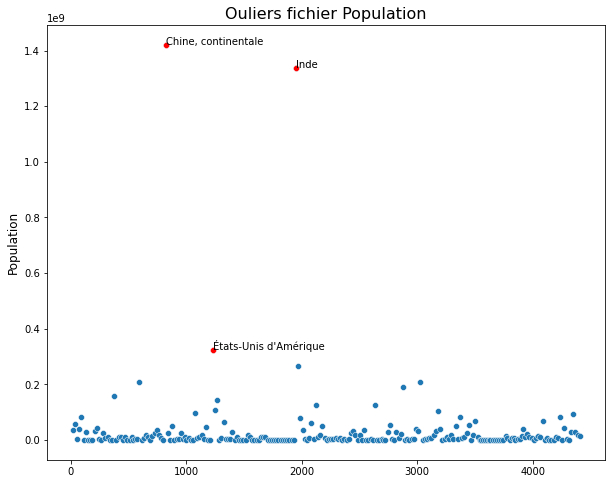

In [30]:
plt.figure(figsize=(10, 8))
plt.title('Ouliers fichier Population', fontsize=16)

sns.scatterplot(x=df_population.index, y=df_population['Valeur'])

sns.scatterplot(x=outliers_country.index, y=outliers_country["Valeur"], color='red')

for i in outliers_country.index:
    plt.annotate(outliers_country.at[i, 'Pays'], (i, outliers_country.at[i, 'Valeur']))


plt.ylabel("Population", fontsize=12)

plt.show()

In [31]:
#df_population.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\population.csv", index=False)

## Fichier PIB

Source : https://www.kaggle.com/

In [32]:
df_pib = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\data\pib-par-habitant.csv", 
    sep=","
    )

In [33]:
df_pib.head(3)

,Country Code,Année,Valeur
0,ABW,2017,29007.693003
1,AFG,2017,519.884773
2,AGO,2017,4095.812942


In [34]:
drop_col_pib = ['Année']
df_pib = df_pib.drop(columns=drop_col_pib)

In [35]:
df_pib.rename(columns={'Country Code': 'iso3', 'Valeur':'PIB (US$)/hab'}, inplace=True)

In [36]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso3           251 non-null    object 
 1   PIB (US$)/hab  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [37]:
df_pib.describe()

,PIB (US$)/hab
count,251.000000
mean,16433.538026
std,24454.380641
min,292.997631
25%,2175.189153
50%,6376.706716
75%,19308.138162
max,173356.051288


### NaN

In [38]:
df_pib.isna().sum()

iso3             0
PIB (US$)/hab    0
dtype: int64

### Verif doublons

In [39]:
colonnes_a_verifier = "iso3"

mask_doublons = df_pib.duplicated(subset=colonnes_a_verifier, keep=False)

doublons = df_pib.loc[mask_doublons]

doublons

,iso3,PIB (US$)/hab


### Recherche d'outliers

Premier quartile (Q1) : 2175.1891527040952
Troisième quartile (Q3) : 19308.1381619143
Écart interquartile (IQR) : 17132.949009210206
Lower_bound => -23524.234361111216
Upper_bound => 45007.56167572961


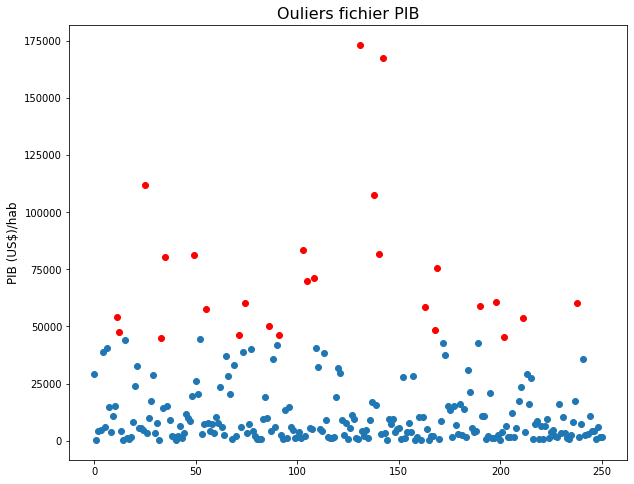

In [40]:
df_pib_iqr = df_pib.copy()

q1 = np.percentile(df_pib_iqr['PIB (US$)/hab'], 25)

# Calcul du troisième quartile (Q3)
q3 = np.percentile(df_pib_iqr['PIB (US$)/hab'], 75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

print("Premier quartile (Q1) :", q1)
print("Troisième quartile (Q3) :", q3)
print("Écart interquartile (IQR) :", iqr)

print("Lower_bound => " + str(lower_bound))
print("Upper_bound => " + str(upper_bound))

only_ok = df_pib_iqr[(df_pib_iqr['PIB (US$)/hab'] < upper_bound) & (df_pib_iqr['PIB (US$)/hab'] > lower_bound)]
only_outliers = df_pib_iqr[(df_pib_iqr['PIB (US$)/hab']> upper_bound) | (df_pib_iqr['PIB (US$)/hab'] < lower_bound)]

# On plot

plt.figure(figsize=(10,8))
plt.title('Ouliers fichier PIB', fontsize=16)
plt.ylabel("PIB (US$)/hab", fontsize=12)

plt.scatter(only_ok['PIB (US$)/hab'].index, only_ok['PIB (US$)/hab'].values)
plt.scatter(only_outliers['PIB (US$)/hab'].index, only_outliers['PIB (US$)/hab'].values,c='red')
plt.show()

In [41]:
#affichage des outliers par ordre croissant

only_outliers.sort_values(by='PIB (US$)/hab')

,iso3,PIB (US$)/hab
33,CAN,45146.114000
202,SMR,45399.029061
91,HKG,46165.856512
71,FIN,46336.663253
12,AUT,47426.511960
168,NLD,48675.222335
86,GRL,50321.368754
211,SWE,53791.508730
11,AUS,54027.966818
55,DNK,57610.098180


In [42]:
#df_pib.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\pib.csv", index=False)

## Fichier distance 

Source : https://www.kaggle.com/

In [43]:
df_dist = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\data\distances_pays.csv", 
    sep=";"
    )

In [44]:
df_dist.head(3)

,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193


In [45]:
df_dist.shape

(50176, 14)

In [46]:
df_dist.columns

Index(['iso_o', 'iso_d', 'contig', 'comlang_off', 'comlang_ethno', 'colony',
       'comcol', 'curcol', 'col45', 'smctry', 'dist', 'distcap', 'distw',
       'distwces'],
      dtype='object')

In [47]:
#filtre sur la france car c'est la distance avec la FR qui nous interesse

df_dist = df_dist[df_dist['iso_o'] == 'FRA']

In [48]:
drop_col_dist = ['comlang_off','contig', 'iso_o', 'comlang_ethno', 'colony', 'comcol', 'curcol', 'col45', 'smctry', 'distcap', 'distw', 'distwces']

df_dist = df_dist.drop(columns=drop_col_dist)

In [49]:
df_dist.rename(columns={'iso_d': 'iso3'}, inplace=True)

In [50]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 15008 to 15231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    224 non-null    object 
 1   dist    224 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


In [51]:
df_dist.head(3)

,iso3,dist
15008,ABW,7685.884
15009,AFG,5590.381
15010,AGO,6510.322


### NaN

In [52]:
df_dist.isna().sum()

iso3    0
dist    0
dtype: int64

### Recherche de doublons

In [53]:
colonnes_a_verifier = "iso3"

mask_doublons = df_dist.duplicated(subset=colonnes_a_verifier, keep=False)

doublons = df_dist.loc[mask_doublons]

doublons

,iso3,dist


In [54]:
#df_dist.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\distances.csv", index=False)

# 2. Merge des fichiers

## Dispalim & Population

In [55]:
df_poulet = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\dispo alim.csv",
    sep=","
    )

df_population = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\population.csv",
    sep=","
    )

In [56]:
#pivot de la table 

df_poulet_pivot = df_poulet.pivot(index='Pays', columns='Élément', values='Valeur')

In [57]:
df_poulet_pivot.head(10)

Élément,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure(Tonnes),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes)
Pays,,,,
Afghanistan,1.53,57000.0,NaN,29000.0
Afrique du Sud,35.69,2118000.0,63000.0,514000.0
Albanie,16.36,47000.0,0.0,38000.0
Algérie,6.38,277000.0,0.0,2000.0
Allemagne,19.47,1739000.0,646000.0,842000.0
Angola,10.56,319000.0,0.0,277000.0
Antigua-et-Barbuda,54.10,7000.0,0.0,7000.0
Arabie saoudite,43.36,1435000.0,10000.0,722000.0
Argentine,42.24,1962000.0,207000.0,8000.0


In [58]:
merged_1 = pd.merge(df_poulet_pivot, df_population, how='inner', on='Pays', indicator=True)

In [59]:
keys_count = merged_1['_merge'].value_counts()

print(keys_count)

both          172
left_only       0
right_only      0
Name: _merge, dtype: int64


In [60]:
#suppression colonnes inutiles

col_supp_merge1 = ['_merge', 'Code Élément', 'Produit', 'Année', 'Code Élément', 'Code Produit', 'Code Pays', 'Disponibilité intérieure(Tonnes)', 'Élément', 'Note']

merged_1.drop(col_supp_merge1, axis=1, inplace=True)

merged_1.rename(columns={"Valeur":"Population"}, inplace=True)

In [61]:
merged_1.head(5)

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Population
0,Afghanistan,1.53,NaN,29000.0,36296113.0
1,Afrique du Sud,35.69,63000.0,514000.0,57009756.0
2,Albanie,16.36,0.0,38000.0,2884169.0
3,Algérie,6.38,0.0,2000.0,41389189.0
4,Allemagne,19.47,646000.0,842000.0,82658409.0


In [62]:
merged_1.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\merges\poulet_population.csv", index=False)

## Distance & PIB

In [63]:
df_pib = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\pib.csv",
    sep=","
    )

df_dist = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\distances.csv",
    sep=","
    )

In [64]:
merged_2 = pd.merge( df_pib, df_dist, how='inner', on='iso3', indicator=True)

merged_2.head(3)

,iso3,PIB (US$)/hab,dist,_merge
0,ABW,29007.693003,7685.884,both
1,AFG,519.884773,5590.381,both
2,AGO,4095.812942,6510.322,both


In [65]:
keys_count = merged_2['_merge'].value_counts()

print(keys_count)

both          190
left_only       0
right_only      0
Name: _merge, dtype: int64


In [66]:
merged_2.drop('_merge', axis=1, inplace=True)

In [67]:
country_to_iso3 = {
    'AFG': 'Afghanistan',
    'ZAF': 'Afrique du Sud',
    'ALB': 'Albanie',
    'DZA': 'Algérie',
    'DEU': 'Allemagne',
    'AGO': 'Angola',
    'ATG': 'Antigua-et-Barbuda',
    'SAU': 'Arabie saoudite',
    'ARG': 'Argentine',
    'ARM': 'Arménie',
    'AUS': 'Australie',
    'AUT': 'Autriche',
    'AZE': 'Azerbaïdjan',
    'BHS': 'Bahamas',
    'BGD': 'Bangladesh',
    'BRB': 'Barbade',
    'BEL': 'Belgique',
    'BLZ': 'Belize',
    'BOL': 'Bolivie (État plurinational de)',
    'BIH': 'Bosnie-Herzégovine',
    'BWA': 'Botswana',
    'BRA': 'Brésil',
    'BGR': 'Bulgarie',
    'BFA': 'Burkina Faso',
    'BLR': 'Bélarus',
    'BEN': 'Bénin',
    'CPV': 'Cabo Verde',
    'KHM': 'Cambodge',
    'CMR': 'Cameroun',
    'CAN': 'Canada',
    'CHL': 'Chili',
    'HKG': 'Chine - RAS de Hong-Kong',
    'MAC': 'Chine - RAS de Macao',
    'TWN': 'Chine, Taiwan Province de',
    'CHN': 'Chine, continentale',
    'CYP': 'Chypre',
    'COL': 'Colombie',
    'COG': 'Congo',
    'CRI': 'Costa Rica',
    'HRV': 'Croatie',
    'CUB': 'Cuba',
    'CIV': "Côte d'Ivoire",
    'DNK': 'Danemark',
    'DJI': 'Djibouti',
    'DMA': 'Dominique',
    'SLV': 'El Salvador',
    'ESP': 'Espagne',
    'EST': 'Estonie',
    'SWZ': 'Eswatini',
    'FJI': 'Fidji',
    'FIN': 'Finlande',
    'FRA': 'France',
    'RUS': 'Fédération de Russie',
    'GAB': 'Gabon',
    'GMB': 'Gambie',
    'GHA': 'Ghana',
    'GRD': 'Grenade',
    'GRC': 'Grèce',
    'GTM': 'Guatemala',
    'GIN': 'Guinée',
    'GNB': 'Guinée-Bissau',
    'GUY': 'Guyana',
    'GEO': 'Géorgie',
    'HTI': 'Haïti',
    'HND': 'Honduras',
    'HUN': 'Hongrie',
    'IND': 'Inde',
    'IDN': 'Indonésie',
    'IRN': "Iran (République islamique d')",
    'IRQ': 'Iraq',
    'IRL': 'Irlande',
    'ISL': 'Islande',
    'ISR': 'Israël',
    'ITA': 'Italie',
    'JAM': 'Jamaïque',
    'JPN': 'Japon',
    'JOR': 'Jordanie',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KGZ': 'Kirghizistan',
    'KIR': 'Kiribati',
    'KWT': 'Koweït',
    'LSO': 'Lesotho',
    'LVA': 'Lettonie',
    'LBN': 'Liban',
    'LBR': 'Libéria',
    'LTU': 'Lituanie',
    'LUX': 'Luxembourg',
    'MKD': 'Macédoine du Nord',
    'MDG': 'Madagascar',
    'MYS': 'Malaisie',
    'MWI': 'Malawi',
    'MDV': 'Maldives',
    'MLI': 'Mali',
    'MLT': 'Malte',
    'MAR': 'Maroc',
    'MUS': 'Maurice',
    'MRT': 'Mauritanie',
    'MEX': 'Mexique',
    'MNG': 'Mongolie',
    'MNE': 'Monténégro',
    'MOZ': 'Mozambique',
    'MMR': 'Myanmar',
    'NAM': 'Namibie',
    'NIC': 'Nicaragua',
    'NER': 'Niger',
    'NGA': 'Nigéria',
    'NOR': 'Norvège',
    'NCL': 'Nouvelle-Calédonie',
    'NZL': 'Nouvelle-Zélande',
    'NPL': 'Népal',
    'OMN': 'Oman',
    'UGA': 'Ouganda',
    'UZB': 'Ouzbékistan',
    'PAK': 'Pakistan',
    'PAN': 'Panama',
    'PRY': 'Paraguay',
    'NLD': 'Pays-Bas',
    'PHL': 'Philippines',
    'POL': 'Pologne',
    'PYF': 'Polynésie française',
    'PRT': 'Portugal',
    'PER': 'Pérou',
    'ROU': 'Roumanie',
    'GBR': 'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord',
    'RWA': 'Rwanda',
    'CAF': 'République centrafricaine',
    'KOR': 'République de Corée',
    'MDA': 'République de Moldova',
    'DOM': 'République dominicaine',
    'LAO': 'République démocratique populaire lao',
    'PRK': 'République populaire démocratique de Corée',
    'TZA': 'République-Unie de Tanzanie',
    'KNA': 'Saint-Kitts-et-Nevis',
    'VCT': 'Saint-Vincent-et-les Grenadines',
    'LCA': 'Sainte-Lucie',
    'WSM': 'Samoa',
    'STP': 'Sao Tomé-et-Principe',
    'SRB': 'Serbie',
    'SLE': 'Sierra Leone',
    'SVK': 'Slovaquie',
    'SVN': 'Slovénie',
    'SDN': 'Soudan',
    'LKA': 'Sri Lanka',
    'CHE': 'Suisse',
    'SUR': 'Suriname',
    'SWE': 'Suède',
    'SEN': 'Sénégal',
    'TJK': 'Tadjikistan',
    'TCD': 'Tchad',
    'CZE': 'Tchéquie',
    'THA': 'Thaïlande',
    'TLS': 'Timor-Leste',
    'TGO': 'Togo',
    'TTO': 'Trinité-et-Tobago',
    'TUN': 'Tunisie',
    'TKM': 'Turkménistan',
    'TUR': 'Turquie',
    'UKR': 'Ukraine',
    'URY': 'Uruguay',
    'VUT': 'Vanuatu',
    'VEN': 'Venezuela (République bolivarienne du)',
    'VNM': 'Viet Nam',
    'YEM': 'Yémen',
    'ZMB': 'Zambie',
    'ZWE': 'Zimbabwe',
    'EGY': 'Égypte',
    'ARE': 'Émirats arabes unis',
    'ECU': 'Équateur',
    'USA': 'États-Unis d\'Amérique',
    'ETH': 'Éthiopie',
    'SLB': 'Îles Salomon'
}

merged_2['pays'] = merged_2['iso3'].map(country_to_iso3)

In [68]:
merged_2 = merged_2.dropna()

In [69]:
col_merged2 = ['iso3', 'pays', 'PIB (US$)/hab',	'dist']

merged_2 = merged_2[col_merged2]

In [70]:
merged_2.rename(columns={"dist":"distance", 'pays':'Pays'}, inplace=True)

In [71]:
merged_2.head(3)

,iso3,Pays,PIB (US$)/hab,distance
1,AFG,Afghanistan,519.884773,5590.381
2,AGO,Angola,4095.812942,6510.322
3,ALB,Albanie,4531.020806,1603.534


### Main_df

In [72]:
df_pouletpop = pd.read_csv(
    r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\merges\poulet_population.csv",
    sep=","
    )

In [73]:
main_df =  pd.merge(df_pouletpop, merged_2, how='left', on='Pays', indicator=True)

main_df.head(3)

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Population,iso3,PIB (US$)/hab,distance,_merge
0,Afghanistan,1.53,NaN,29000.0,36296113.0,AFG,519.884773,5590.381,both
1,Afrique du Sud,35.69,63000.0,514000.0,57009756.0,ZAF,6131.479450,9353.552,both
2,Albanie,16.36,0.0,38000.0,2884169.0,ALB,4531.020806,1603.534,both


In [74]:
keys_count = main_df['_merge'].value_counts()

print(keys_count)

both          163
left_only       9
right_only      0
Name: _merge, dtype: int64


In [75]:
left_only_rows = main_df[main_df['_merge'] == 'left_only']

left_only_rows

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),Population,iso3,PIB (US$)/hab,distance,_merge
33,"Chine, Taiwan Province de",33.17,8000.0,161000.0,23674546.0,NaN,NaN,NaN,left_only
100,Monténégro,15.98,0.0,8000.0,627563.0,NaN,NaN,NaN,left_only
108,Nouvelle-Calédonie,38.71,NaN,9000.0,277150.0,NaN,NaN,NaN,left_only
120,Polynésie française,47.40,0.0,15000.0,276102.0,NaN,NaN,NaN,left_only
123,Roumanie,19.37,69000.0,146000.0,19653969.0,NaN,NaN,NaN,left_only
131,République populaire démocratique de Corée,1.62,0.0,0.0,25429825.0,NaN,NaN,NaN,left_only
138,Serbie,10.16,7000.0,12000.0,8829628.0,NaN,NaN,NaN,left_only
152,Timor-Leste,4.24,NaN,11000.0,1243258.0,NaN,NaN,NaN,left_only
161,Venezuela (République bolivarienne du),20.28,0.0,25000.0,29402484.0,NaN,NaN,NaN,left_only


In [76]:
left_only_rows.shape

(9, 9)

In [77]:
main_df.drop(left_only_rows.index, inplace=True)

In [78]:
main_df.drop('_merge', axis=1, inplace=True)

In [79]:
#ajout des continents pour chaque pays (génération du dictionnaire par chatGPT)

pays_continent = {
    'Afghanistan': 'Asie',
    'Afrique du Sud': 'Afrique',
    'Albanie': 'Europe',
    'Algérie': 'Afrique',
    'Allemagne': 'Europe',
    'Angola': 'Afrique',
    'Antigua-et-Barbuda': 'Amérique',
    'Arabie saoudite': 'Asie',
    'Argentine': 'Amérique',
    'Arménie': 'Asie',
    'Australie': 'Océanie',
    'Autriche': 'Europe',
    'Azerbaïdjan': 'Asie',
    'Bahamas': 'Amérique',
    'Bangladesh': 'Asie',
    'Barbade': 'Amérique',
    'Belgique': 'Europe',
    'Belize': 'Amérique',
    'Bolivie (État plurinational de)': 'Amérique',
    'Bosnie-Herzégovine': 'Europe',
    'Botswana': 'Afrique',
    'Brésil': 'Amérique',
    'Bulgarie': 'Europe',
    'Burkina Faso': 'Afrique',
    'Bélarus': 'Europe',
    'Bénin': 'Afrique',
    'Cabo Verde': 'Afrique',
    'Cambodge': 'Asie',
    'Cameroun': 'Afrique',
    'Canada': 'Amérique',
    'Chili': 'Amérique',
    'Chine - RAS de Hong-Kong': 'Asie',
    'Chine - RAS de Macao': 'Asie',
    'Chine, Taiwan Province de': 'Asie',
    'Chine, continentale': 'Asie',
    'Chypre': 'Asie',
    'Colombie': 'Amérique',
    'Congo': 'Afrique',
    'Costa Rica': 'Amérique',
    'Croatie': 'Europe',
    'Cuba': 'Amérique',
    "Côte d'Ivoire": 'Afrique',
    'Danemark': 'Europe',
    'Djibouti': 'Afrique',
    'Dominique': 'Amérique',
    'El Salvador': 'Amérique',
    'Espagne': 'Europe',
    'Estonie': 'Europe',
    'Eswatini': 'Afrique',
    'Fidji': 'Océanie',
    'Finlande': 'Europe',
    'France': 'Europe',
    'Fédération de Russie': 'Asie',
    'Gabon': 'Afrique',
    'Gambie': 'Afrique',
    'Ghana': 'Afrique',
    'Grenade': 'Amérique',
    'Grèce': 'Europe',
    'Guatemala': 'Amérique',
    'Guinée': 'Afrique',
    'Guinée-Bissau': 'Afrique',
    'Guyana': 'Amérique',
    'Géorgie': 'Asie',
    'Haïti': 'Amérique',
    'Honduras': 'Amérique',
    'Hongrie': 'Europe',
    'Inde': 'Asie',
    'Indonésie': 'Asie',
    "Iran (République islamique d')": 'Asie',
    'Iraq': 'Asie',
    'Irlande': 'Europe',
    'Islande': 'Europe',
    'Israël': 'Asie',
    'Italie': 'Europe',
    'Jamaïque': 'Amérique',
    'Japon': 'Asie',
    'Jordanie': 'Asie',
    'Kazakhstan': 'Asie',
    'Kenya': 'Afrique',
    'Kirghizistan': 'Asie',
    'Kiribati': 'Océanie',
    'Koweït': 'Asie',
    'Lesotho': 'Afrique',
    'Lettonie': 'Europe',
    'Liban': 'Asie',
    'Libéria': 'Afrique',
    'Lituanie': 'Europe',
    'Luxembourg': 'Europe',
    'Macédoine du Nord': 'Europe',
    'Madagascar': 'Afrique',
    'Malaisie': 'Asie',
    'Malawi': 'Afrique',
    'Maldives': 'Asie',
    'Mali': 'Afrique',
    'Malte': 'Europe',
    'Maroc': 'Afrique',
    'Maurice': 'Afrique',
    'Mauritanie': 'Afrique',
    'Mexique': 'Amérique',
    'Mongolie': 'Asie',
    'Monténégro': 'Europe',
    'Mozambique': 'Afrique',
    'Myanmar': 'Asie',
    'Namibie': 'Afrique',
    'Nicaragua': 'Amérique',
    'Niger': 'Afrique',
    'Nigéria': 'Afrique',
    'Norvège': 'Europe',
    'Nouvelle-Calédonie': 'Océanie',
    'Nouvelle-Zélande': 'Océanie',
    'Népal': 'Asie',
    'Oman': 'Asie',
    'Ouganda': 'Afrique',
    'Ouzbékistan': 'Asie',
    'Pakistan': 'Asie',
    'Panama': 'Amérique',
    'Paraguay': 'Amérique',
    'Pays-Bas': 'Europe',
    'Philippines': 'Asie',
    'Pologne': 'Europe',
    'Polynésie française': 'Océanie',
    'Portugal': 'Europe',
    'Pérou': 'Amérique',
    'Roumanie': 'Europe',
    "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": 'Europe',
    'Rwanda': 'Afrique',
    'République centrafricaine': 'Afrique',
    'République de Corée': 'Asie',
    'République de Moldova': 'Europe',
    'République dominicaine': 'Amérique',
    'République démocratique populaire lao': 'Asie',
    'République populaire démocratique de Corée': 'Asie',
    'République-Unie de Tanzanie': 'Afrique',
    'Saint-Kitts-et-Nevis': 'Amérique',
    'Saint-Vincent-et-les Grenadines': 'Amérique',
    'Sainte-Lucie': 'Amérique',
    'Samoa': 'Océanie',
    'Sao Tomé-et-Principe': 'Afrique',
    'Serbie': 'Europe',
    'Sierra Leone': 'Afrique',
    'Slovaquie': 'Europe',
    'Slovénie': 'Europe',
    'Soudan': 'Afrique',
    'Sri Lanka': 'Asie',
    'Suisse': 'Europe',
    'Suriname': 'Amérique',
    'Suède': 'Europe',
    'Sénégal': 'Afrique',
    'Tadjikistan': 'Asie',
    'Tchad': 'Afrique',
    'Tchéquie': 'Europe',
    'Thaïlande': 'Asie',
    'Timor-Leste': 'Asie',
    'Togo': 'Afrique',
    'Trinité-et-Tobago': 'Amérique',
    'Tunisie': 'Afrique',
    'Turkménistan': 'Asie',
    'Turquie': 'Asie',
    'Ukraine': 'Europe',
    'Uruguay': 'Amérique',
    'Vanuatu': 'Océanie',
    'Venezuela (République bolivarienne du)': 'Amérique',
    'Viet Nam': 'Asie',
    'Yémen': 'Asie',
    'Zambie': 'Afrique',
    'Zimbabwe': 'Afrique',
    'Égypte': 'Afrique',
    'Émirats arabes unis': 'Asie',
    'Équateur': 'Amérique',
    "États-Unis d'Amérique": 'Amérique',
    'Éthiopie': 'Afrique',
    'Îles Salomon': 'Océanie'
}

main_df['Continent'] = main_df['Pays'].map(pays_continent)

In [80]:
col_main_df = ['iso3', 'Pays', 'Continent', 'Population', 'PIB (US$)/hab',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Exportations - Quantité(Tonnes)',
       'Importations - Quantité(Tonnes)',
       'distance'
       ]

main_df = main_df[col_main_df]

In [81]:
main_df.head(5)

,iso3,Pays,Continent,Population,PIB (US$)/hab,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),distance
0,AFG,Afghanistan,Asie,36296113.0,519.884773,1.53,NaN,29000.0,5590.3810
1,ZAF,Afrique du Sud,Afrique,57009756.0,6131.479450,35.69,63000.0,514000.0,9353.5520
2,ALB,Albanie,Europe,2884169.0,4531.020806,16.36,0.0,38000.0,1603.5340
3,DZA,Algérie,Afrique,41389189.0,4111.294110,6.38,0.0,2000.0,1340.3900
4,DEU,Allemagne,Europe,82658409.0,44552.819372,19.47,646000.0,842000.0,439.8984


In [82]:
#affichage des valeurs manquantes dans le df

main_df[main_df.isna().any(axis=1)]

,iso3,Pays,Continent,Population,PIB (US$)/hab,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),distance
0,AFG,Afghanistan,Asie,36296113.0,519.884773,1.53,NaN,29000.0,5590.381
13,BHS,Bahamas,Amérique,381755.0,32718.638101,43.17,NaN,24000.0,7209.450
14,BGD,Bangladesh,Asie,159685424.0,1563.913699,1.50,NaN,0.0,7916.790
23,BFA,Burkina Faso,Afrique,19193234.0,734.994430,2.27,NaN,0.0,4082.870
26,CPV,Cabo Verde,Afrique,537498.0,3292.645755,17.62,NaN,12000.0,4452.386
27,KHM,Cambodge,Asie,16009409.0,1385.259980,2.34,NaN,10000.0,9947.790
40,CUB,Cuba,Amérique,11339254.0,8541.210673,23.72,NaN,312000.0,7729.485
43,DJI,Djibouti,Afrique,944099.0,2914.383856,2.68,NaN,3000.0,5595.459
54,GMB,Gambie,Afrique,2213889.0,679.756914,3.53,NaN,16000.0,4308.250
56,GRD,Grenade,Amérique,110874.0,10152.832812,45.70,NaN,7000.0,7120.287


In [83]:
#remplacement des NaN par 0

main_df.fillna(0, inplace=True)

In [84]:
main_df.isna().sum()

iso3                                                      0
Pays                                                      0
Continent                                                 0
Population                                                0
PIB (US$)/hab                                             0
Disponibilité alimentaire en quantité (kg/personne/an)    0
Exportations - Quantité(Tonnes)                           0
Importations - Quantité(Tonnes)                           0
distance                                                  0
dtype: int64

In [85]:
main_df.duplicated().sum()

0

In [86]:
main_df[main_df["Pays"]=='France']

,iso3,Pays,Continent,Population,PIB (US$)/hab,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité(Tonnes),Importations - Quantité(Tonnes),distance
51,FRA,France,Europe,64842509.0,38812.161034,22.9,501000.0,506000.0,278.1876


In [87]:
main_df = main_df.drop(index=51)

In [88]:
main_df.to_csv(r"C:\Users\derou\OneDrive\Bureau\OPENCLASS\PROJETS\P9 - Produisez une étude de marché\RW\CSV\merges\main_df.csv", index=False)